In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import qexpy as q


def linear_plot(**kwargs):
    plt.figure(figsize=(10,8))
    if "xerr" not in kwargs:
        kwargs["xerr"] = 0
    if "yerr" not in kwargs:
        kwargs["xerr"] = 0

    ## Plot points
    plt.errorbar(kwargs["xdata"],
                 kwargs["ydata"], 
                 yerr=kwargs["yerr"], 
                 xerr=kwargs["xerr"],
                 fmt='.', 
                 capsize=3, 
                 label=kwargs["data_name"]) 
    
    if "lin_label" not in kwargs:
        kwargs["lin_label"] = "Weighted Linear Regression"
        
    ## Generate Line
    if "slope" not in kwargs or "intercecpt" not in kwargs:
        dataset = q.XYDataSet(xdata = kwargs["xdata"],
                              ydata = kwargs["ydata"],
                              yerr = kwargs["yerr"],
                              xerr = kwargs["xerr"])
        intercept, slope = dataset.fit("linear")
        print("Regression: {:6e} +/- x {:3e} + {:6e} +/- {:3e}".
              format(slope.mean, slope.std, intercept.mean, intercept.std))
        kwargs["slope"] = slope
        kwargs["intercept"] = intercept
        
        
    ## Plot line
    plt.plot(kwargs["xdata"], kwargs["slope"].mean * kwargs["xdata"] + kwargs["intercept"].mean, 
             label=kwargs["lin_label"])
    plt.legend()   
    plt.title(kwargs["title"])
    plt.ylabel(kwargs["yname"] + " " + kwargs["yunits"])
    plt.xlabel(kwargs["xname"] + " " + kwargs["xunits"])
    
    ## Annotate Line
    if "auto_annotate" in kwargs and kwargs["auto_annotate"] == True:
        plt.annotate("{:.2e} * {} + {:.2e} = {}".format(kwargs["slope"].mean,
                                                       kwargs["xname"],
                                                       kwargs["intercept"].mean,
                                                       kwargs["yname"]),
                     xy=(kwargs["xdata"][len(kwargs["xdata"])//2], 
                         kwargs["ydata"][len(kwargs["ydata"])//2]))
    elif "annotate" in kwargs:
        plt.annotate(kwargs["annotate"], 
                     xy=kwargs["xy"])

    ## Save figgure
    if "path" in kwargs:
        plt.savefig(kwargs["path"])
    plt.show()
    
    return kwargs["slope"], kwargs["intercept"]



Loading BokehJS ...

PART 1:
Theoretical: 0.0001314 +/- 0.0000005
-----------------Fit results-------------------
Fit of  dataset0  to  linear
Fit parameters:
dataset0_linear_fit0_fitpars_intercept = 0.000016 +/- 0.000004,
dataset0_linear_fit0_fitpars_slope = 0.0001207 +/- 0.0000005

Correlation matrix: 
[[ 1.    -0.905]
 [-0.905  1.   ]]

chi2/ndof = 0.10/2
---------------End fit results----------------

Regression: 1.207115e-04 +/- x 4.541156e-07 + 1.640000e-05 +/- 3.810512e-06


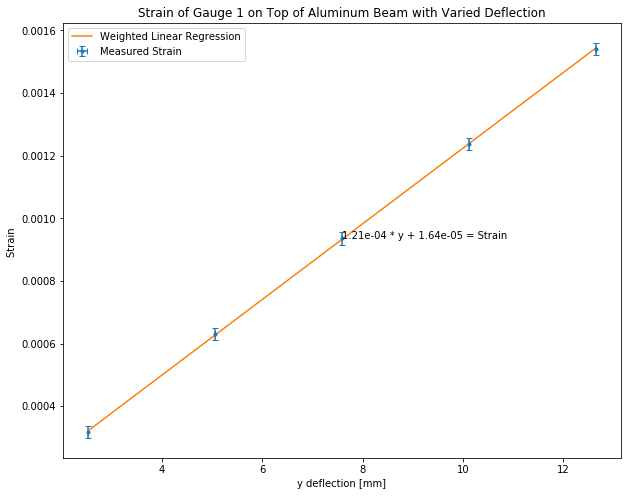

Theoretical: 0.0000878 +/- 0.0000003
-----------------Fit results-------------------
Fit of  dataset1  to  linear
Fit parameters:
dataset1_linear_fit0_fitpars_intercept = 0.000021 +/- 0.000002,
dataset1_linear_fit0_fitpars_slope = 0.0000810 +/- 0.0000002

Correlation matrix: 
[[ 1.    -0.905]
 [-0.905  1.   ]]

chi2/ndof = 0.03/2
---------------End fit results----------------

Regression: 8.098814e-05 +/- x 2.360537e-07 + 2.050000e-05 +/- 1.980741e-06


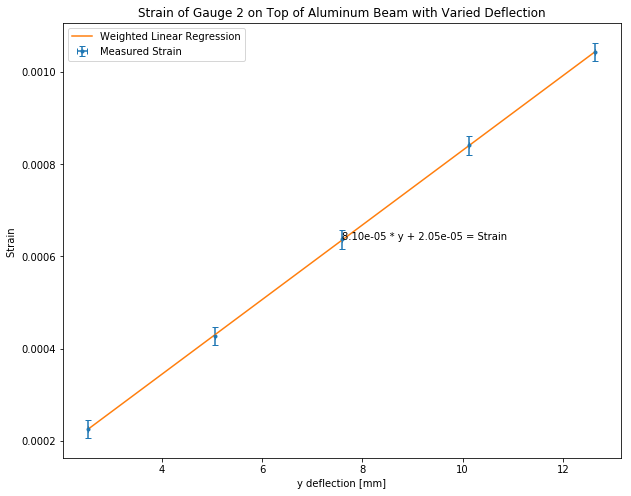

Theoretical: 0.00004552 +/- 0.00000007
-----------------Fit results-------------------
Fit of  dataset2  to  linear
Fit parameters:
dataset2_linear_fit0_fitpars_intercept = 0.000008 +/- 0.000005,
dataset2_linear_fit0_fitpars_slope = 0.0000412 +/- 0.0000007

Correlation matrix: 
[[ 1.    -0.905]
 [-0.905  1.   ]]

chi2/ndof = 0.20/2
---------------End fit results----------------

Regression: 4.118577e-05 +/- x 6.518743e-07 + 8.400000e-06 +/- 5.469917e-06


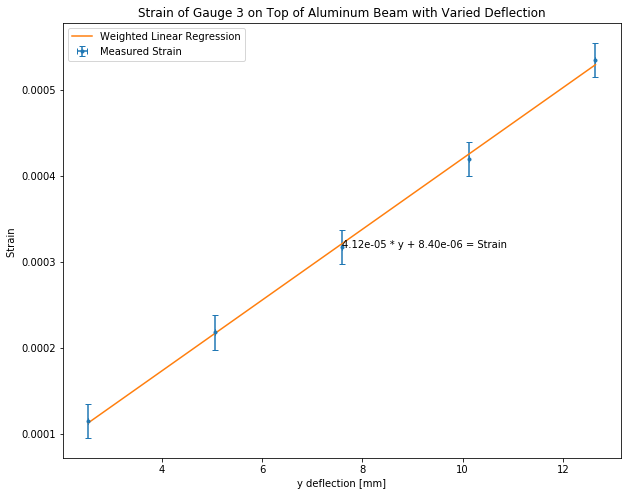

In [2]:
import pandas as pd
import numpy as np
import qexpy as q


def eq4_slope(L, a, x):
    return 3 * a * (L - x)/(2 * L**3)
    
print("PART 1:")
strain1_csv = pd.read_csv("../data/strain1 data.csv").as_matrix()
deflection = strain1_csv[:, 0] * 25.3 # Convert to mm

beam_csv = pd.read_csv("../data/beam data clean.csv").as_matrix()
L_micrometer = q.Measurement(beam_csv[:, 3][0], 0.5) # mm
beam_thickness = q.Measurement(beam_csv[:, 4][0], 0.01) # mm
beam_width = q.Measurement(beam_csv[:, 5][0], 0.01) # mm
gauge1_x = q.Measurement(beam_csv[0, 0], 0.01)
gauge2_x = q.Measurement(beam_csv[0, 1], 0.01)
gauge3_x = q.Measurement(beam_csv[0, 2], 0.01)



print("Theoretical:", eq4_slope(L_micrometer, beam_thickness, gauge1_x))
gauge1Strain = linear_plot(xdata = deflection,
                      ydata = strain1_csv[:, 1] * 10**-5,
                      yerr = 2 * 10**-5,
                      xname = 'y', xunits='deflection [mm]',
                      yname = 'Strain', yunits = '',
                      data_name = 'Measured Strain',
                      title ='Strain of Gauge 1 on Top of Aluminum Beam with Varied Deflection',
                      path="../output/graph/gauge1Strain.png",
                      auto_annotate=True)

print("Theoretical:", eq4_slope(L_micrometer, beam_thickness, gauge2_x))
gauge2Strain = linear_plot(xdata = deflection,
                      ydata = strain1_csv[:, 2] * 10**-5,
                      yerr = 2 * 10**-5,
                      xname = 'y', xunits='deflection [mm]',
                      yname = 'Strain', yunits = '',
                      data_name = 'Measured Strain',
                      title ='Strain of Gauge 2 on Top of Aluminum Beam with Varied Deflection',
                      path="../output/graph/gauge2Strain.png",
                      auto_annotate=True)

print("Theoretical:", eq4_slope(L_micrometer, beam_thickness, gauge3_x))
gauge3Strain = linear_plot(xdata = deflection,
                      ydata = strain1_csv[:, 3] * 10**-5,
                      yerr = 2 * 10**-5,
                      xname = 'y', xunits='deflection [mm]',
                      yname = 'Strain', yunits = '',
                      data_name = 'Measured Strain',
                      title ='Strain of Gauge 3 on Top of Aluminum Beam with Varied Deflection',
                      path="../output/graph/gauge3Strain.png",
                      auto_annotate=True)

PART 2:
-----------------Fit results-------------------
Fit of  dataset3  to  linear
Fit parameters:
dataset3_linear_fit0_fitpars_intercept = 0.000008 +/- 0.000003,
dataset3_linear_fit0_fitpars_slope = 0.0000219 +/- 0.0000002

Correlation matrix: 
[[ 1.    -0.859]
 [-0.859  1.   ]]

chi2/ndof = 0.07/2
---------------End fit results----------------

Regression: 2.188552e-05 +/- x 2.015987e-07 + 8.349160e-06 +/- 2.729690e-06


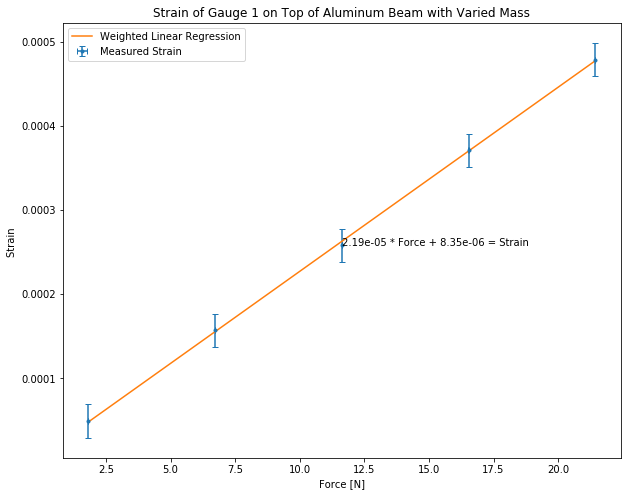

Young's Modulus 6.96e+10 GPa +/- 7e+08 GPa


In [3]:
def youngs(a, b, L, x, slope):
    return 1/((a**2 * b * slope)/ (6 * (L - x)))

print("PART 2:")
weight_csv = pd.read_csv("../data/strain2 data.csv").as_matrix()
L_dimple = q.Measurement(286, 0.5) # mm

masses = q.MeasurementArray(weight_csv[:, 0]/1000, weight_csv[:, 1]/1000) * 9.8 # kg
weight_slope, weight_intercept =\
    linear_plot(
          xdata = masses.get_means(),
          xerr = masses.get_stds(),
          ydata = weight_csv[:, 2] * 10**-5,
          yerr = 2 * 10**-5,
          xname = 'Force', xunits='[N]',
          yname = 'Strain', yunits = '',
          data_name = 'Measured Strain',
          title ='Strain of Gauge 1 on Top of Aluminum Beam with Varied Mass',
          path="../output/graph/weightStrain.png",
          auto_annotate=True)


Y = youngs(beam_thickness/1000, beam_width, L_dimple, gauge1_x, weight_slope)
print("Young's Modulus {:.3g} GPa +/- {:.1g} GPa".format(Y.mean, Y.std))

PART 3:
-----------------Fit results-------------------
Fit of  dataset4  to  linear
Fit parameters:
dataset4_linear_fit0_fitpars_intercept = 0.000054 +/- 0.000008,
dataset4_linear_fit0_fitpars_slope = 0.0001143 +/- 0.0000009

Correlation matrix: 
[[ 1.    -0.905]
 [-0.905  1.   ]]

chi2/ndof = 0.39/2
---------------End fit results----------------

Regression: 1.143083e-04 +/- x 9.036326e-07 + 5.380000e-05 +/- 7.582436e-06


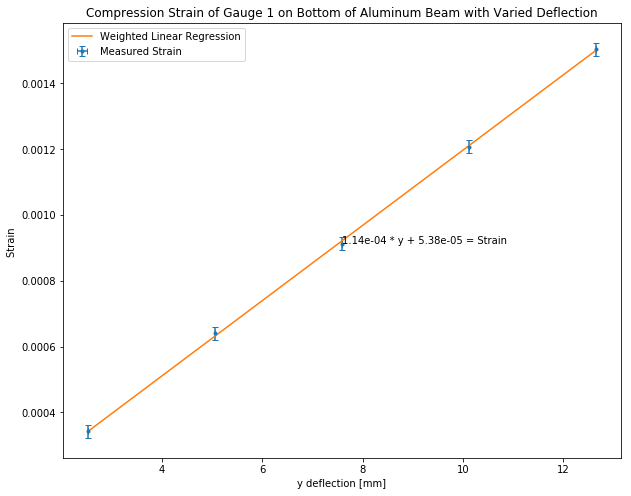

(<qexpy.error.Measurement at 0x115af6518>,
 <qexpy.error.Measurement at 0x115af6470>)

In [4]:
print("PART 3:")
compression_csv = pd.read_csv("../data/strain3 data.csv").as_matrix()
compressionStrain = q.MeasurementArray(compression_csv[:, 1], 2)

masses = q.MeasurementArray(weight_csv[:, 0]/1000, weight_csv[:, 1]/1000) * 9.8# kg
linear_plot(
      xdata = deflection,
      ydata = compressionStrain.get_means() * 10**-5,
      yerr = compressionStrain.get_stds() * 10**-5,
      xname = 'y', xunits='deflection [mm]',
      yname = 'Strain', yunits = '',
      data_name = 'Measured Strain',
      title = 'Compression Strain of Gauge 1 on Bottom of Aluminum Beam with Varied Deflection',
      path= "../output/graph/compressionStrain.png",
      auto_annotate=True)

PART 4:
-----------------Fit results-------------------
Fit of  dataset5  to  linear
Fit parameters:
dataset5_linear_fit0_fitpars_intercept = -0.000015 +/- 0.000002,
dataset5_linear_fit0_fitpars_slope = -0.322 +/- 0.002

Correlation matrix: 
[[ 1.    -0.909]
 [-0.909  1.   ]]

chi2/ndof = 0.04/2
---------------End fit results----------------

Regression: -3.216038e-01 +/- x 2.342757e-03 + -1.501445e-05 +/- 2.342168e-06


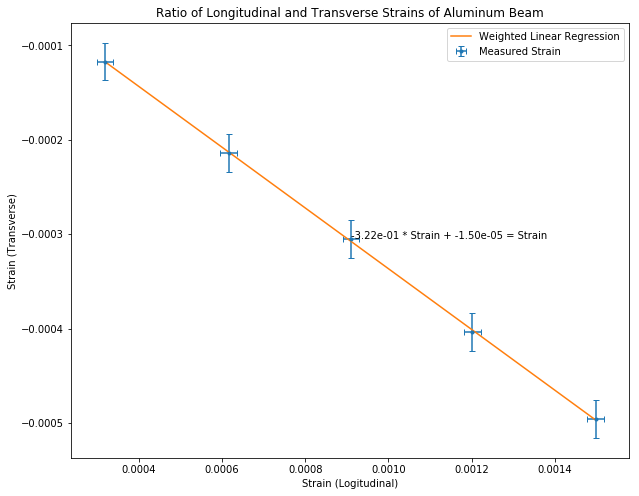

-----------------Fit results-------------------
Fit of  dataset6  to  linear
Fit parameters:
dataset6_linear_fit0_fitpars_intercept = -0.000023 +/- 0.000002,
dataset6_linear_fit0_fitpars_slope = -0.0000374 +/- 0.0000003

Correlation matrix: 
[[ 1.    -0.905]
 [-0.905  1.   ]]

chi2/ndof = 0.03/2
---------------End fit results----------------

Regression: -3.744901e-05 +/- x 2.537960e-07 + -2.305000e-05 +/- 2.129618e-06


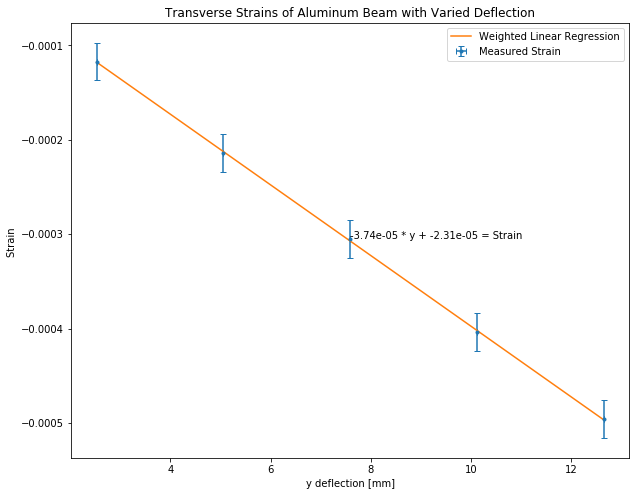

-----------------Fit results-------------------
Fit of  dataset7  to  linear
Fit parameters:
dataset7_linear_fit0_fitpars_intercept = 0.000025 +/- 0.000002,
dataset7_linear_fit0_fitpars_slope = 0.0001164 +/- 0.0000002

Correlation matrix: 
[[ 1.    -0.905]
 [-0.905  1.   ]]

chi2/ndof = 0.02/2
---------------End fit results----------------

Regression: 1.164427e-04 +/- x 2.188834e-07 + 2.500000e-05 +/- 1.836664e-06


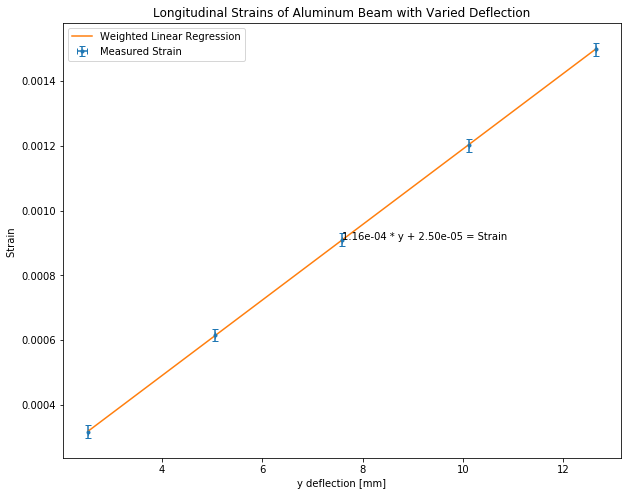

(<qexpy.error.Measurement at 0x114d97438>,
 <qexpy.error.Measurement at 0x114d971d0>)

In [5]:
print("PART 4:")

compression_csv = pd.read_csv("../data/strain4 data.csv").as_matrix()
longitudinalStrain = q.MeasurementArray(compression_csv[:, 1], 2)
transverseStrain = q.MeasurementArray(compression_csv[:, 2], 2)

Kt = 0.01
correctedTransverse = -transverseStrain - Kt * longitudinalStrain

linear_plot(
      xdata = longitudinalStrain.get_means() * 10**-5,
      xerr = longitudinalStrain.get_stds() * 10**-5,
      ydata = correctedTransverse.get_means() * 10**-5,
      yerr = correctedTransverse.get_stds() * 10**-5,
      xname = 'Strain', xunits='(Logitudinal)',
      yname = 'Strain', yunits = '(Transverse)',
      data_name = 'Measured Strain',
      title = 'Ratio of Longitudinal and Transverse Strains of Aluminum Beam',
      path= "../output/graph/poisson.png",
      auto_annotate=True)


linear_plot(
      xdata = deflection,
      ydata = correctedTransverse.get_means() * 10**-5,
      yerr = correctedTransverse.get_stds() * 10**-5,
      xname = 'y', xunits='deflection [mm]',
      yname = 'Strain', yunits = '',
      data_name = 'Measured Strain',
      title = 'Transverse Strains of Aluminum Beam with Varied Deflection',
      path= "../output/graph/transverse.png",
      auto_annotate=True)

linear_plot(
      xdata = deflection,
      ydata = longitudinalStrain.get_means() * 10**-5,
      yerr = longitudinalStrain.get_stds() * 10**-5,
      xname = 'y', xunits='deflection [mm]',
      yname = 'Strain', yunits = '',
      data_name = 'Measured Strain',
      title = 'Longitudinal Strains of Aluminum Beam with Varied Deflection',
      path= "../output/graph/longitudinal.png",
      auto_annotate=True)